In [55]:
import numpy as np
import pandas as pd
import lightgbm as lgbm
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
train_data = pd.read_csv('./NBA_DATA3/2016-17_teamBoxScore.csv')
test_data = pd.read_csv('./NBA_DATA3/2017-18_teamBoxScore.csv')
base_train_data = train_data.copy()
train_data

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2017-04-12,10:30,Regular,Williams,James,Garretson,Ron,Ayotte,Mark,GS,...,51.0504,90.6779,105.1478,-14.4699,0.4100,16.4098,1.2778,72.2222,103.6636,104.0973
2456,2017-04-12,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,SAC,...,86.2033,129.7661,107.1981,22.5680,0.5513,22.4806,4.8333,66.6667,88.6210,88.6210
2457,2017-04-12,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,LAC,...,57.0833,107.1981,129.7661,-22.5680,0.4706,21.5724,2.4545,18.1818,88.6210,88.2533
2458,2017-04-12,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,NO,...,57.1875,100.9166,103.9441,-3.0275,0.4271,15.9744,0.8800,16.0000,99.0917,98.6805


In [11]:
train_data.describe()

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,241.726423,1.713821,105.591057,22.626423,13.963008,7.714634,4.772358,19.898780,85.397967,39.049187,...,65.602944,108.892624,108.892624,0.000000,0.438181,17.024517,1.774878,59.529623,97.015479,96.327066
std,7.189213,1.103532,12.148609,5.239513,3.880150,2.899403,2.483006,4.239371,7.071338,4.956133,...,13.541500,11.377983,11.377983,14.544787,0.051243,3.303426,0.750945,28.839730,5.639101,4.922166
min,237.000000,0.000000,64.000000,7.000000,3.000000,1.000000,0.000000,8.000000,62.000000,21.000000,...,22.510400,71.812400,71.812400,-54.076500,0.261900,5.882400,0.450000,5.000000,81.981000,81.640800
25%,240.000000,1.000000,97.000000,19.000000,11.000000,6.000000,3.000000,17.000000,81.000000,36.000000,...,56.458300,101.387950,101.387950,-9.372675,0.402550,14.792900,1.263200,40.000000,93.176600,92.867200
50%,240.000000,2.000000,106.000000,22.000000,14.000000,8.000000,4.000000,20.000000,85.000000,39.000000,...,64.937800,108.969150,108.969150,0.000000,0.438200,17.067400,1.636400,54.545500,96.542750,96.054950
75%,241.000000,2.000000,114.000000,26.000000,16.000000,9.000000,6.000000,23.000000,90.000000,42.000000,...,74.508450,116.552100,116.552100,9.372675,0.472500,19.194250,2.090900,73.333300,100.498800,99.662075
max,341.000000,9.000000,149.000000,47.000000,29.000000,20.000000,15.000000,39.000000,128.000000,57.000000,...,123.319300,147.231600,147.231600,54.076500,0.606400,29.671700,8.333300,266.666700,130.761500,113.266900


# Preparing to analysis

In [12]:
# Date processing
date_value = pd.to_datetime(train_data['gmDate'], errors='coerce')
time_value = pd.to_datetime(train_data['gmTime'], errors='coerce')


train_data['year'] = date_value.dt.year
train_data['month'] = date_value.dt.month
train_data['day'] = date_value.dt.day
train_data['hour'] = time_value.dt.hour
train_data['minute'] = time_value.dt.minute

del train_data['gmDate']
del train_data['gmTime']
train_data

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,East,Atlantic,...,20.8951,2.0667,80.0000,100.3729,100.3729,2016,10,25,8,0
1,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,East,Central,...,12.9969,0.9444,33.3333,100.3729,99.9564,2016,10,25,8,0
2,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,West,Northwest,...,18.3824,1.6923,38.4615,92.5380,92.1540,2016,10,25,10,0
3,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,West,Northwest,...,15.5687,1.3571,64.2857,92.5380,92.9252,2016,10,25,10,0
4,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,West,Southwest,...,18.0560,1.5000,68.7500,98.7765,98.7765,2016,10,25,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Regular,Williams,James,Garretson,Ron,Ayotte,Mark,GS,West,Pacific,...,16.4098,1.2778,72.2222,103.6636,104.0973,2017,4,12,10,30
2456,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,SAC,West,Pacific,...,22.4806,4.8333,66.6667,88.6210,88.6210,2017,4,12,10,30
2457,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,LAC,West,Pacific,...,21.5724,2.4545,18.1818,88.6210,88.2533,2017,4,12,10,30
2458,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,NO,West,Southwest,...,15.9744,0.8800,16.0000,99.0917,98.6805,2017,4,12,10,30


In [14]:
# Mapping of teamRslt column
mapping = {'Loss': 2, 'Win': 1}

train_data = train_data.replace({'teamRslt': mapping})
test_data = test_data.replace({'teamRslt': mapping})

In [16]:
# Drop columns with missing values
cols_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]
train_data.drop(cols_with_missing, axis=1, inplace=True)
test_data.drop(cols_with_missing, axis=1, inplace=True)

[]

In [18]:
# Categorical data processing
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train_data.columns.values.tolist()
for col in features:
    if train_data[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if train_data[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(train_data[col])

for col in categorical_columns:
    if train_data[col].dtype in numerics: continue
    train_data[col] = indexer[col].get_indexer(train_data[col])

In [19]:
train_data

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,0,0,0,0,0,0,0,0,0,0,...,20.8951,2.0667,80.0000,100.3729,100.3729,2016,10,25,8,0
1,0,0,0,0,0,0,0,1,0,1,...,12.9969,0.9444,33.3333,100.3729,99.9564,2016,10,25,8,0
2,0,1,1,1,1,1,1,2,1,2,...,18.3824,1.6923,38.4615,92.5380,92.1540,2016,10,25,10,0
3,0,1,1,1,1,1,1,3,1,2,...,15.5687,1.3571,64.2857,92.5380,92.9252,2016,10,25,10,0
4,0,2,2,2,2,2,2,4,1,3,...,18.0560,1.5000,68.7500,98.7765,98.7765,2016,10,25,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,0,15,15,25,25,15,14,5,1,4,...,16.4098,1.2778,72.2222,103.6636,104.0973,2017,4,12,10,30
2456,0,0,0,19,19,17,0,22,1,4,...,22.4806,4.8333,66.6667,88.6210,88.6210,2017,4,12,10,30
2457,0,0,0,19,19,17,0,29,1,4,...,21.5724,2.4545,18.1818,88.6210,88.2533,2017,4,12,10,30
2458,0,47,46,0,0,4,4,19,1,3,...,15.9744,0.8800,16.0000,99.0917,98.6805,2017,4,12,10,30


<AxesSubplot:>

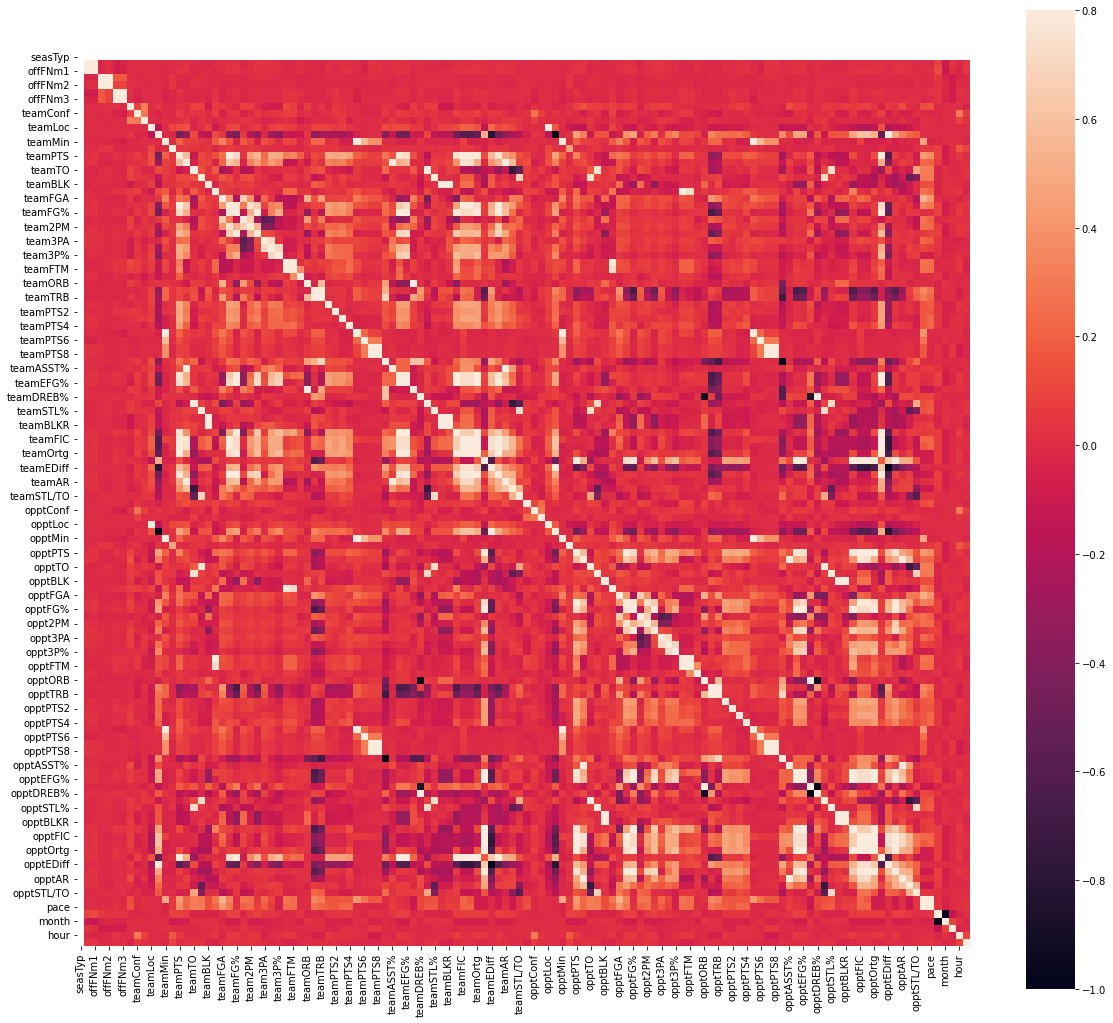

In [20]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corrmat, vmax=.8, square=True)

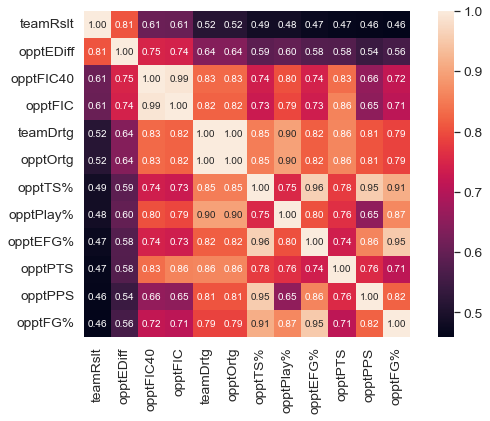

In [38]:
k = 12
cols = corrmat.nlargest(k, 'teamRslt')['teamRslt'].index
f, ax = plt.subplots(figsize=(10,6))
cm = train_data[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

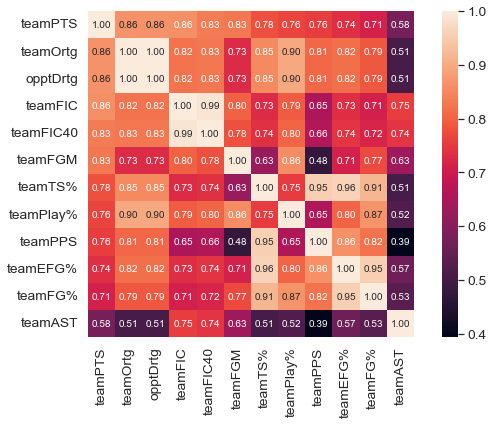

In [39]:
k = 12
cols = corrmat.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

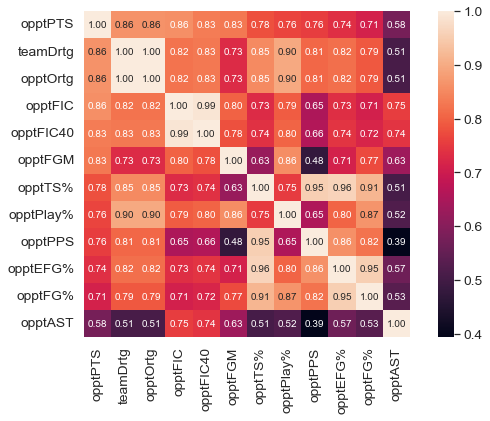

In [40]:
k = 12
cols = corrmat.nlargest(k, 'opptPTS')['opptPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

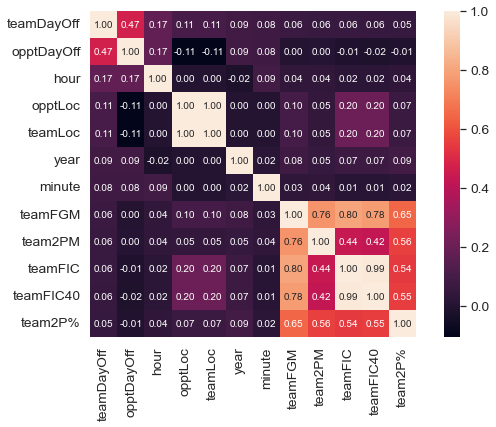

In [41]:
k = 12
cols = corrmat.nlargest(k, 'teamDayOff')['teamDayOff'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
y = train_data['teamRslt']

columns_to_delete = ['teamRslt', 'opptRslt', 'teamEDiff', 'teamFIC', 'opptEDiff', 'opptFIC']

train_data.drop(columns_to_delete, axis=1, inplace=True)

X = train_data;

In [43]:
X

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,0,0,0,0,0,0,0,0,0,0,...,20.8951,2.0667,80.0000,100.3729,100.3729,2016,10,25,8,0
1,0,0,0,0,0,0,0,1,0,1,...,12.9969,0.9444,33.3333,100.3729,99.9564,2016,10,25,8,0
2,0,1,1,1,1,1,1,2,1,2,...,18.3824,1.6923,38.4615,92.5380,92.1540,2016,10,25,10,0
3,0,1,1,1,1,1,1,3,1,2,...,15.5687,1.3571,64.2857,92.5380,92.9252,2016,10,25,10,0
4,0,2,2,2,2,2,2,4,1,3,...,18.0560,1.5000,68.7500,98.7765,98.7765,2016,10,25,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,0,15,15,25,25,15,14,5,1,4,...,16.4098,1.2778,72.2222,103.6636,104.0973,2017,4,12,10,30
2456,0,0,0,19,19,17,0,22,1,4,...,22.4806,4.8333,66.6667,88.6210,88.6210,2017,4,12,10,30
2457,0,0,0,19,19,17,0,29,1,4,...,21.5724,2.4545,18.1818,88.6210,88.2533,2017,4,12,10,30
2458,0,47,46,0,0,4,4,19,1,3,...,15.9744,0.8800,16.0000,99.0917,98.6805,2017,4,12,10,30


In [45]:
# data split for train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

C:\Users\xin\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\xin\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\xin\anaconda3\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future re

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20882
[LightGBM] [Info] Number of data points in the train set: 1968, number of used features: 115
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 1.494411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

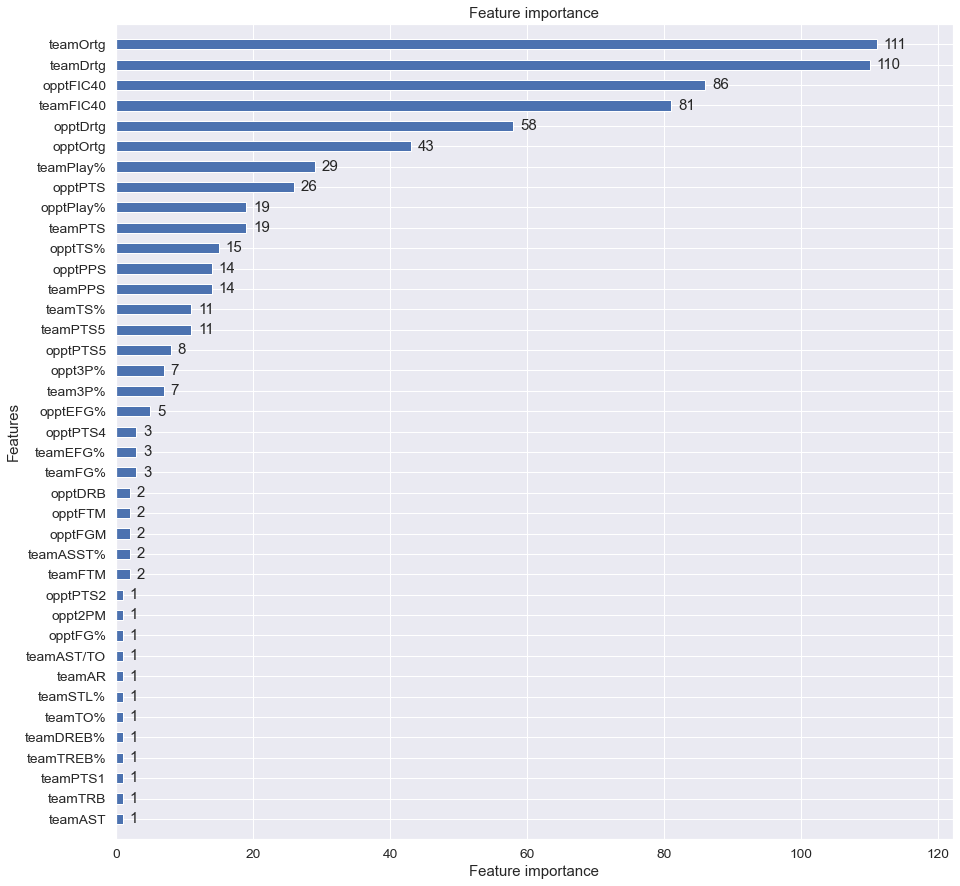

In [46]:
train_set = lgbm.Dataset(X_train, y_train, silent=False)
valid_set = lgbm.Dataset(X_valid, y_valid, silent=False)

params = {
    'boosting_type':'gbdt', 'objective': 'regression', 'num_leaves': 31,
    'learning_rate': 0.05, 'max_depth': -1, 'subsample': 0.8,
    'bagging_fraction' : 1, 'max_bin' : 5000 , 'bagging_freq': 20,
    'colsample_bytree': 0.6, 'metric': 'rmse', 'min_split_gain': 0.5,
    'min_child_weight': 1, 'min_child_samples': 10, 'scale_pos_weight':1,
    'zero_as_missing': True, 'seed':0,
}

modelL = lgbm.train(params, train_set = train_set, num_boost_round=1000,
                    early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgbm.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();

[0]	train-rmse:0.79731	valid-rmse:0.82868
[10]	train-rmse:0.08869	valid-rmse:0.20580
[20]	train-rmse:0.05748	valid-rmse:0.19879
[30]	train-rmse:0.03757	valid-rmse:0.20086
[40]	train-rmse:0.02539	valid-rmse:0.20193
[48]	train-rmse:0.01799	valid-rmse:0.20099


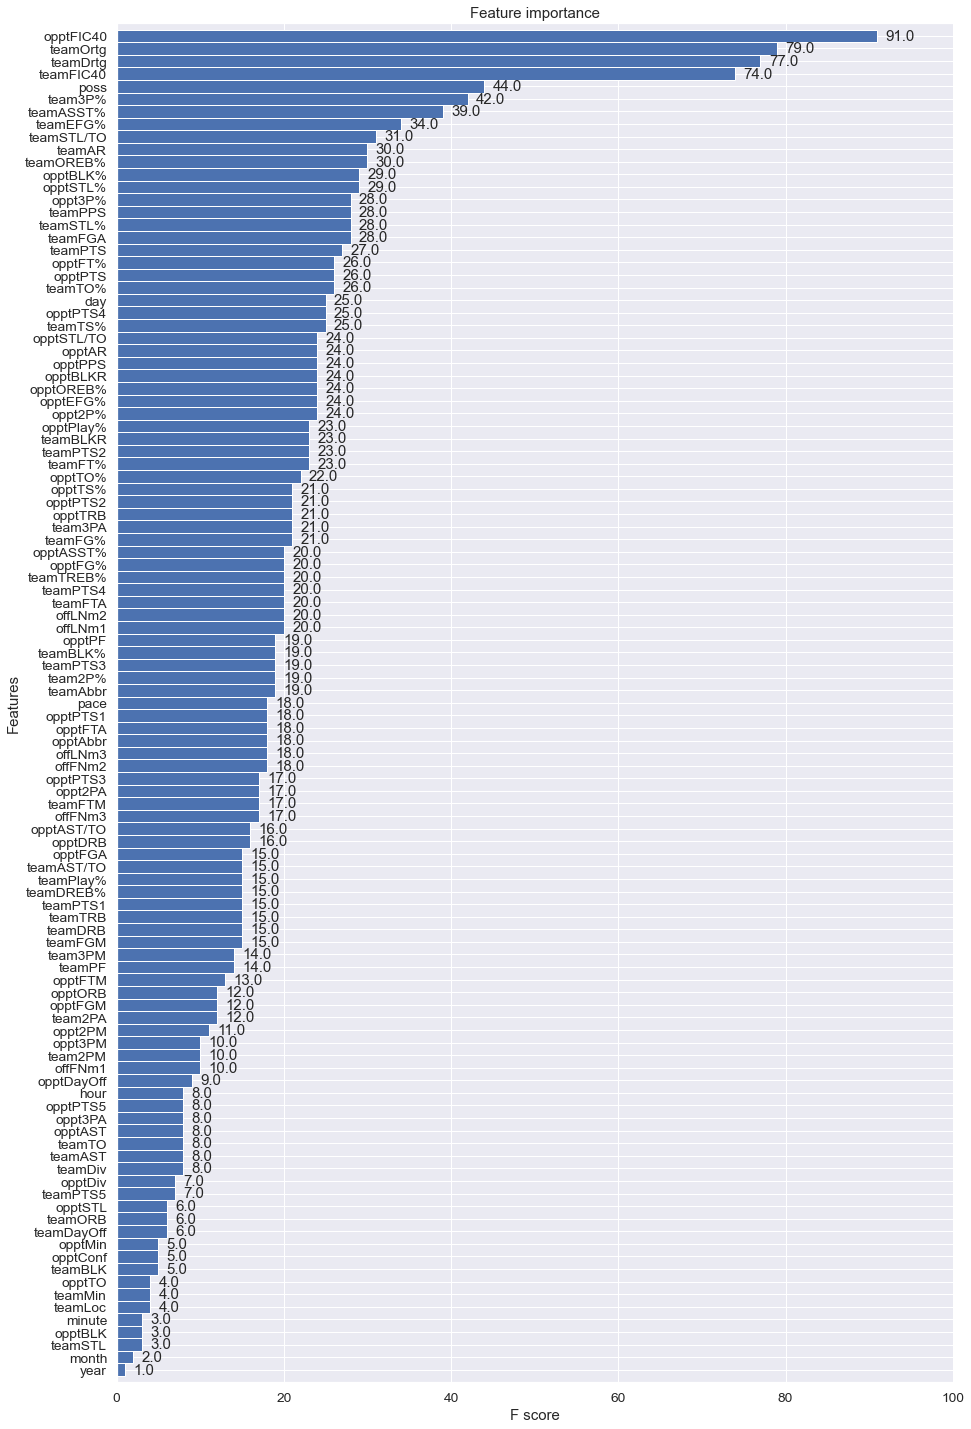

In [49]:
data_tr  = xgb.DMatrix(X_train, label=y_train)
data_cv  = xgb.DMatrix(X_valid   , label=y_valid)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:squarederror',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'colsample_bylevel':1,
         'min_child_weight': 10}
modelx = xgb.train(parms, data_tr, num_boost_round=200, evals = evallist, early_stopping_rounds=30, maximize=False, verbose_eval=10)

fig =  plt.figure(figsize = (15,25))
axes = fig.add_subplot(111)
xgb.plot_importance(modelx,ax = axes,height = 1)
plt.show();plt.close()

In [50]:
feature_columns = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM']
X = X[feature_columns];

X.head()

,opptPTS,teamDrtg,teamTO,teamORB,teamFGM
0,117,116.5653,18,13,32
1,88,87.6731,15,11,45
2,113,122.1120,14,6,40
3,104,112.3863,13,5,39
4,100,101.2387,14,21,47


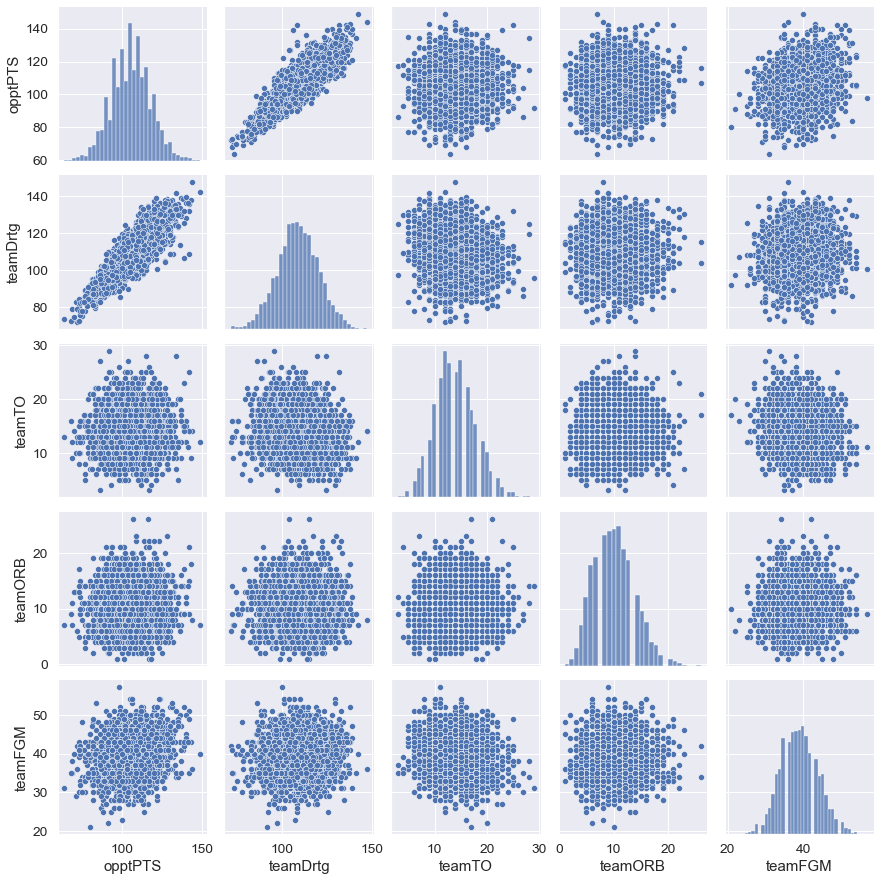

In [51]:
feature_columns = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM']
sns.pairplot(train_data[feature_columns], height=2.5)
plt.show()

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [69]:
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                    max_depth=1, random_state=0).fit(X_train, y_train)
results = []
result = clfgtb.score(X_valid, y_valid) * 100
results.append(result)
print(result)

84.14634146341463


In [70]:
test_data.describe()

,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1.500000,241.480894,1.787398,106.332927,23.239837,14.291057,7.723577,4.813008,19.851626,86.045122,...,66.507574,108.648174,108.648174,0.000000,0.437266,17.365384,1.765154,58.050035,97.897517,97.306235
std,0.500102,6.583839,1.165418,12.065504,5.214414,3.785184,2.928179,2.511461,4.212959,6.863569,...,13.448211,11.181424,11.181424,14.191395,0.051327,3.269830,0.720031,28.393448,5.284437,4.752136
min,1.000000,226.000000,0.000000,69.000000,9.000000,3.000000,0.000000,0.000000,8.000000,66.000000,...,18.437500,74.394300,74.394300,-62.409700,0.255800,7.756700,0.476200,0.000000,83.926800,83.578600
25%,1.000000,240.000000,1.000000,98.000000,20.000000,12.000000,6.000000,3.000000,17.000000,81.000000,...,57.708300,101.245000,101.245000,-9.120125,0.404300,15.124825,1.285700,38.888900,94.173700,94.028125
50%,1.500000,240.000000,2.000000,106.000000,23.000000,14.000000,8.000000,5.000000,20.000000,86.000000,...,66.138950,108.816650,108.816650,0.000000,0.438200,17.299700,1.625000,53.333300,97.606150,97.165050
75%,2.000000,241.000000,2.000000,114.000000,27.000000,17.000000,10.000000,6.000000,23.000000,91.000000,...,75.311525,116.279225,116.279225,9.120125,0.471300,19.519800,2.083300,71.428600,100.908400,100.238300
max,2.000000,317.000000,10.000000,149.000000,46.000000,29.000000,17.000000,16.000000,42.000000,114.000000,...,120.520800,147.222200,147.222200,62.409700,0.616300,29.143400,8.666700,280.000000,121.313800,121.656400


In [71]:
x_new = test_data[feature_columns]
y_new = test_data['teamRslt']
x_new.head()

,opptPTS,teamDrtg,teamTO,teamORB,teamFGM
0,102,101.7143,12,9,36
1,99,98.7227,17,9,38
2,121,118.0353,13,10,47
3,122,119.0108,17,6,43
4,102,103.0506,17,3,29


In [72]:
clss = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
clss.score(x_new, y_new)

0.8260162601626017

In [104]:
matches = [
    {'home_team': 'MIN', 'away_team': 'BOS'},
    {'home_team': 'CLE', 'away_team': 'LAL'},
    {'home_team': 'CHA', 'away_team': 'MIN'},
    {'home_team': 'ORL', 'away_team': 'HOU'},
    {'home_team': 'DET', 'away_team': 'UTA'},
]

for match in matches:
    home_team = match['home_team']
    away_team = match['away_team']

    prev_matches = base_train_data.loc[(base_train_data['teamAbbr'] == home_team) & (base_train_data['opptAbbr'] == away_team)][feature_columns]

    '''avg = prev_matches.mean()
    avg_prev = [prev_matches.mean().values.tolist()]
    pred = clss.predict(avg_prev)
    prob = clss.predict_proba(avg_prev)'''

    pred = clss.predict(prev_matches[1:2].values.tolist())
    prob = clss.predict_proba(prev_matches[1:2].values.tolist())

    print(home_team + ' vs ' + away_team)
    print(pred)
    print(prob)
    print('-------------------------------\n')

MIN vs BOS
[2]
[[0.08405733 0.91594267]]
-------------------------------

CLE vs LAL
[1]
[[0.54575317 0.45424683]]
-------------------------------

CHA vs MIN
[2]
[[0.2477053 0.7522947]]
-------------------------------

ORL vs HOU
[2]
[[0.02144435 0.97855565]]
-------------------------------

DET vs UTA
[1]
[[0.70571597 0.29428403]]
-------------------------------



In [103]:
base_train_data.loc[('MIN' == base_train_data['teamAbbr']) & ('BOS' == base_train_data['opptAbbr'])][feature_columns][1:2].values.tolist()


[[117.0, 129.3061, 8.0, 15.0, 40.0]]

In [101]:
base_train_data.loc[('MIN' == base_train_data['teamAbbr']) & ('BOS' == base_train_data['opptAbbr'])][feature_columns].mean().values.tolist()

[108.0, 117.33185, 11.5, 15.5, 38.0]